## Ultimate Data Science Challenge

### Part 1: Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [105]:
import json 
import pandas as pd 
import numpy as np 
from datetime import datetime, timedelta
import time

In [106]:
df = pd.read_json('logins.json')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [108]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [109]:
# def datetime_range(start, end, delta):
#     current = start
#     while current < end:
#         yield current
#         current += delta

In [110]:
df2 = df.rename(index={0: '0', 1: '1', 2: '2'})
print('Renamed Indexes:\n', df2)

Renamed Indexes:
                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]


In [111]:
df2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [112]:
df2 = df2.groupby(df2['login_time'].dt.floor('15T')).sum()

/var/folders/30/6_p3qd654sq5h_s7nwrzyryw0000gn/T/ipykernel_95438/4265458893.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df2 = df2.groupby(df2['login_time'].dt.floor('15T')).sum()


In [113]:
df.index = df['login_time']
df2['login_counts'] = df.resample('15min').count()

In [114]:
df2.head(10)

,login_counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9
1970-01-01 22:15:00,8


In [115]:
import matplotlib.pyplot as plt

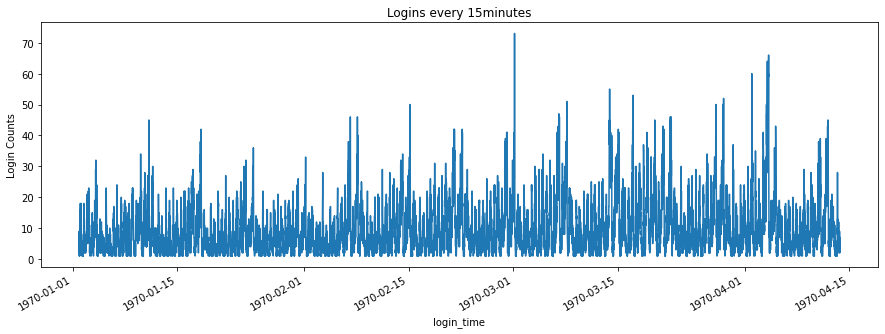

In [116]:
df2['login_counts'].plot(figsize=(15,5))
plt.ylabel("Login Counts")
plt.title('Logins every 15minutes')
plt.show()

### What are the underlying patterns of demand. 

In [117]:
# The peaks show when there were the most logins
sorted_df = df2.sort_values('login_counts', ascending=False)
print(sorted_df.head(15))

                     login_counts
login_time                       
1970-03-01 04:30:00            73
1970-04-04 05:30:00            66
1970-04-04 01:30:00            64
1970-04-04 01:15:00            63
1970-04-04 05:00:00            60
1970-04-01 23:30:00            60
1970-04-04 04:45:00            59
1970-04-04 05:15:00            59
1970-04-04 01:45:00            56
1970-03-13 22:15:00            55
1970-04-04 01:00:00            54
1970-04-04 00:30:00            53
1970-03-17 01:30:00            53
1970-03-29 04:45:00            52
1970-03-08 04:45:00            51


The maximum logins happened on the weekends, based on a simple sort. 

In [118]:
df2['Day_of_Week'] = df2.index.weekday
#Monday is 0, Sunday is 6

In [119]:
df2['Day_of_Week'].value_counts()

6    1418
5    1407
4    1396
0    1350
3    1281
2    1276
1    1253
Name: Day_of_Week, dtype: int64

In [120]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [121]:
df2['Names_of_Weekdays'] = df2['Day_of_Week'].map(weekdays)

In [122]:
df2

,login_counts,Day_of_Week,Names_of_Weekdays
login_time,,,
1970-01-01 20:00:00,2,3,Thursday
1970-01-01 20:15:00,6,3,Thursday
1970-01-01 20:30:00,9,3,Thursday
1970-01-01 20:45:00,7,3,Thursday
1970-01-01 21:00:00,1,3,Thursday
...,...,...,...
1970-04-13 17:45:00,5,0,Monday
1970-04-13 18:00:00,5,0,Monday
1970-04-13 18:15:00,2,0,Monday


In [123]:
df2.reset_index(inplace=True)

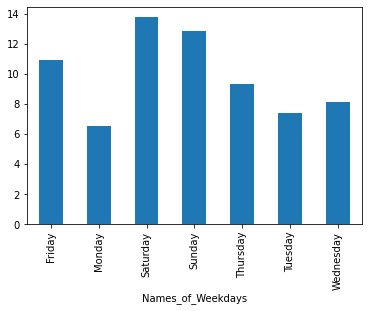

In [124]:
df2[['Names_of_Weekdays','login_counts']].groupby('Names_of_Weekdays').mean().plot(kind='bar', legend=None)

plt.show()

In [125]:
df2['Hours'] = df2['login_time'].dt.hour

In [126]:
df2

,login_time,login_counts,Day_of_Week,Names_of_Weekdays,Hours
0,1970-01-01 20:00:00,2,3,Thursday,20
1,1970-01-01 20:15:00,6,3,Thursday,20
2,1970-01-01 20:30:00,9,3,Thursday,20
3,1970-01-01 20:45:00,7,3,Thursday,20
4,1970-01-01 21:00:00,1,3,Thursday,21
...,...,...,...,...,...
9376,1970-04-13 17:45:00,5,0,Monday,17
9377,1970-04-13 18:00:00,5,0,Monday,18
9378,1970-04-13 18:15:00,2,0,Monday,18
9379,1970-04-13 18:30:00,7,0,Monday,18


In [127]:
import seaborn as sns

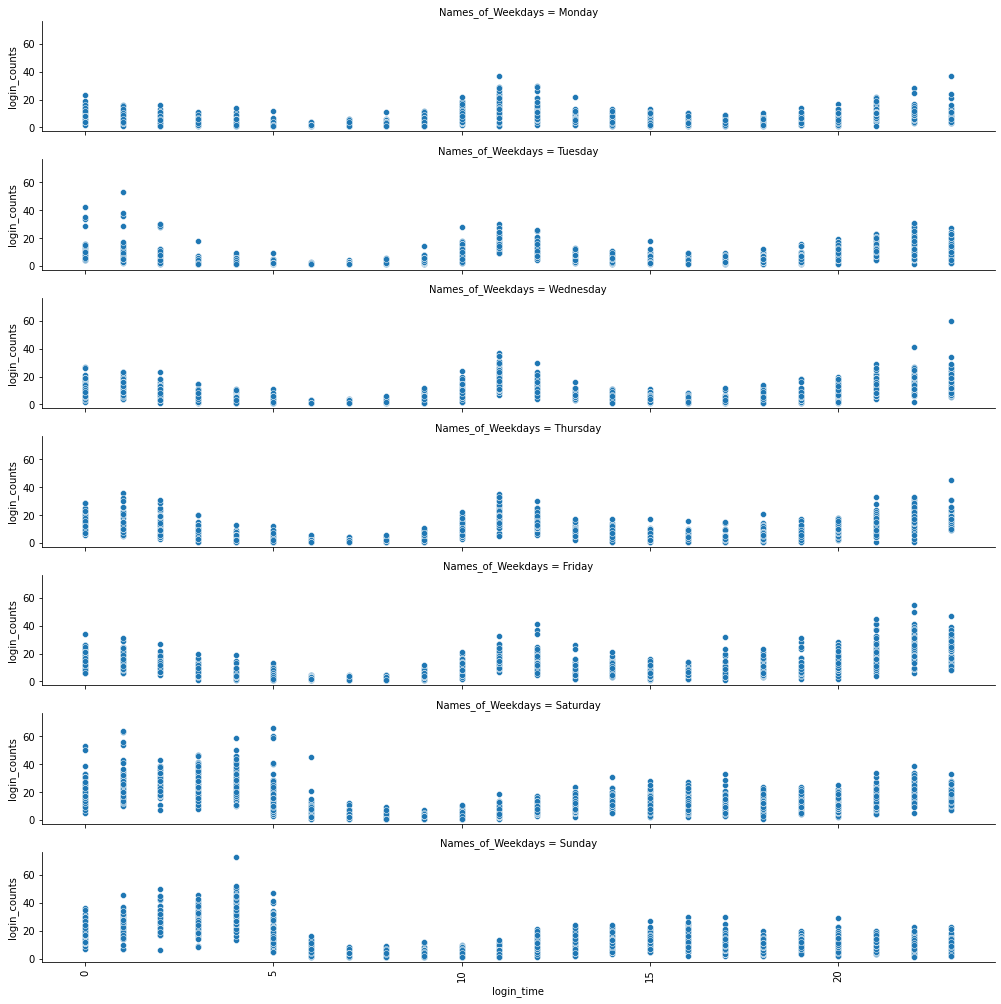

In [128]:
ax = sns.relplot(data=df2, x=df2["login_time"].dt.hour, y="login_counts", row='Names_of_Weekdays', 
            row_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],kind='scatter', ci=None, height=2, aspect=7)
plt.xticks(rotation=90)
plt.show()

#### Conclusion

There was elevated activity during the weekends on Friday night, Saturday morning, Saturday night and Sunday morning from 9pm - 5am. Over the weekdays most peaks in use were around 11-12pm in the afternoons where people could possibly be having lunch. I noticed some outlier user logins on a few weekdays around 12am-1am when most people are in bed. One thing I have to mention in data quality is what are we studying where individuals from the 1970s are logining into so late in the night, unless this data is cellphone related which wouldn't correlate to the provided timestamps and could be an error. 

## Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key measure of success would be how much the city reimburses for toll costs because then we could calculate how many driver partners have entered the bridge that crosses into either city. 

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
 #####   a) how you will implement the experiment
 #####   b) what statistical test(s) you will conduct to verify the significance of the observation
 #####   c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A practical experiment would be to study the average weekend toll payments for crossing into the city. A z-test would be conducted to verify the significance of the two population means. In order to interpret the results we would set the hypothesis and the null hypothesis to whether the  provided recommendation of giving a toll bridge rebate was successful in incentivizing driver partners from both cities to commute to the other city over the weekends.

## Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [129]:
#what factors are the best predictors for retention

In [130]:
df = pd.read_json('ultimate_data_challenge.json')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [132]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [133]:
df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [134]:
from datetime import datetime

In [135]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [137]:
df.shape

(50000, 12)

In [138]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [139]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [140]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [141]:
df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000


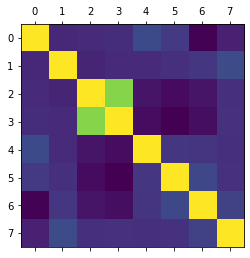

In [142]:
plt.matshow(df.corr())
plt.show()

##### What is the goal? 

Understand user retention: Looking at the last trip date and 30 days before to create a column for an active user

In [143]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [144]:
df['last_trip_date'].min()

Timestamp('2014-01-01 00:00:00')

In [145]:
from datetime import timedelta

In [146]:
def Active_30days(): 
    return df['last_trip_date'] >= df['last_trip_date'].max() - timedelta(days=30)

In [147]:
df['Active'] = Active_30days()

In [148]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False


In [149]:
#Compare phone type to active column 
df['Iphone_User'] = np.where((df['phone'] == 'iPhone'), df['phone'], False)

In [150]:
df['Android_User'] = np.where((df['phone'] == 'Android'), df['phone'], False)

In [151]:
df.head(10)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active,Iphone_User,Android_User
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,iPhone,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False,Android
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,iPhone,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,iPhone,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False,Android
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True,iPhone,False
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False,False,Android
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False,iPhone,False
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False,False,Android
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False,False,Android


In [152]:
df['Active'].value_counts()

False    31196
True     18804
Name: Active, dtype: int64

There were about 18,804 active users that where still taking rides in the past 30 days.  

In [153]:
df['Iphone_User'].value_counts()

iPhone    34582
False     15418
Name: Iphone_User, dtype: int64

In [154]:
df['Android_User'].value_counts()

False      34978
Android    15022
Name: Android_User, dtype: int64

Dropping the columns avg_rating_of_driver, has to many null values and we do not need this information. 

In [155]:
new_df = df.drop(['avg_rating_of_driver'], axis=1)

In [156]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   49604 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    49799 non-null  float64       
 11  Active                  50000 non-null  bool          
 12  Iphone_User             50000 non-null  object

In [157]:
new_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [158]:
#new_df['Winterfell'] = np.where((new_df['city'] == 'Winterfell'), new_df['city'], False)

In [159]:
#new_df['Astapor'] = np.where((new_df['city'] == 'Astapor'), new_df['city'], False)

In [160]:
#new_df['King`s Landing'] = np.where((new_df['city'] == 'King`s Landing'), new_df['city'], False)

In [161]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   49604 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    49799 non-null  float64       
 11  Active                  50000 non-null  bool          
 12  Iphone_User             50000 non-null  object

In [162]:
#One-hot encoding
new_df = pd.concat([new_df, pd.get_dummies(new_df.city, drop_first=True)], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df.phone, drop_first=False)], axis=1)
n_df = new_df.drop(['city','phone'], axis=1)

In [163]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_surge               50000 non-null  float64       
 3   last_trip_date          50000 non-null  datetime64[ns]
 4   surge_pct               50000 non-null  float64       
 5   ultimate_black_user     50000 non-null  bool          
 6   weekday_pct             50000 non-null  float64       
 7   avg_dist                50000 non-null  float64       
 8   avg_rating_by_driver    49799 non-null  float64       
 9   Active                  50000 non-null  bool          
 10  Iphone_User             50000 non-null  object        
 11  Android_User            50000 non-null  object        
 12  King's Landing          50000 non-null  uint8 

In [164]:
n_df.head(10)

,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active,Iphone_User,Android_User,King's Landing,Winterfell,Android,iPhone
0,4,2014-01-25,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,True,iPhone,False,1,0,0,1
1,0,2014-01-29,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,False,False,Android,0,0,1,0
2,3,2014-01-06,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,False,iPhone,False,0,0,0,1
3,9,2014-01-10,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,True,iPhone,False,1,0,0,1
4,14,2014-01-27,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,False,Android,0,1,1,0
5,2,2014-01-09,1.00,2014-06-06,0.0,True,100.0,10.56,5.0,True,iPhone,False,0,1,0,1
6,1,2014-01-24,1.00,2014-01-25,0.0,False,100.0,3.95,4.0,False,False,Android,0,0,1,0
7,2,2014-01-28,1.00,2014-01-29,0.0,False,100.0,2.04,5.0,False,iPhone,False,0,1,0,1
8,2,2014-01-21,1.00,2014-02-01,0.0,False,100.0,4.36,5.0,False,False,Android,0,1,1,0
9,1,2014-01-03,1.00,2014-01-05,0.0,False,0.0,2.37,5.0,False,False,Android,0,1,1,0


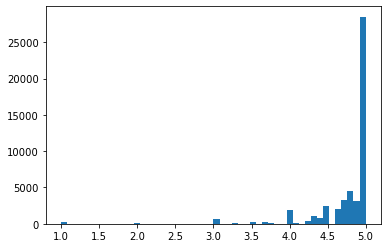

In [165]:
plt.hist(n_df.avg_rating_by_driver, bins=50)
plt.show()

In [191]:
#fill nan values with mean 
# n_df If normal dis: mean, median 
n_df.avg_rating_by_driver.fillna(n_df.avg_rating_by_driver.mean(), axis=0, inplace=True)
# hyperparamenter to make a choice 

#### Modeling

In [192]:
y = n_df['Active']

In [193]:
y.value_counts()

False    31196
True     18804
Name: Active, dtype: int64

In [194]:
X = n_df[["trips_in_first_30_days", "avg_surge", "surge_pct", "ultimate_black_user", "weekday_pct", "avg_dist", 
        "avg_rating_by_driver", "King's Landing", "Winterfell", "Android", "iPhone"]]

In [195]:
X.head()

,trips_in_first_30_days,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,Android,iPhone
0,4,1.10,15.4,True,46.2,3.67,5.0,1,0,0,1
1,0,1.00,0.0,False,50.0,8.26,5.0,0,0,1,0
2,3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,1
3,9,1.14,20.0,True,80.0,2.36,4.9,1,0,0,1
4,14,1.19,11.8,False,82.4,3.13,4.9,0,1,1,0


In [196]:
X.isnull().values.any()

False

#### Build a Predictive Model 

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [207]:
#logistic regression
#Random Forest
#GaussianNB
from sklearn.pipeline import Pipeline

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [209]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression
accuracy: 0.7136


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


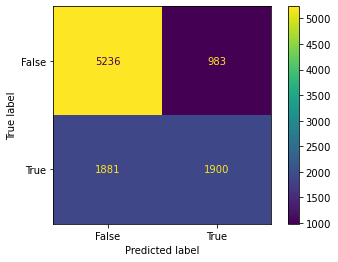

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


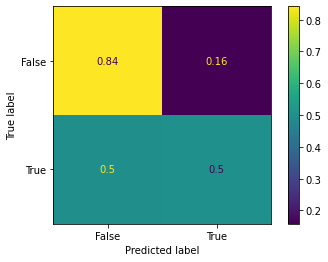



RandomForest
accuracy: 0.7481


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


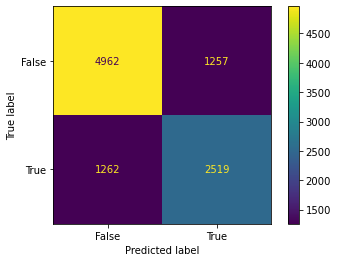

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


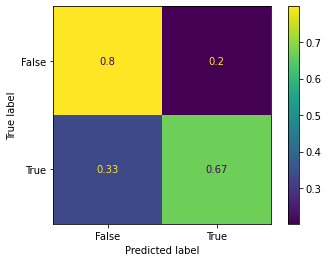



SVC
accuracy: 0.7286


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


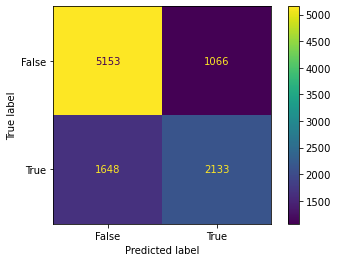

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


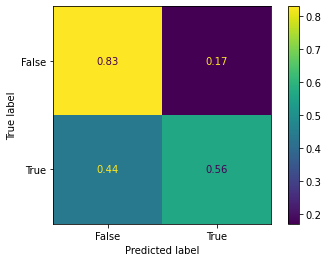



Naive Bayes
accuracy: 0.6981


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


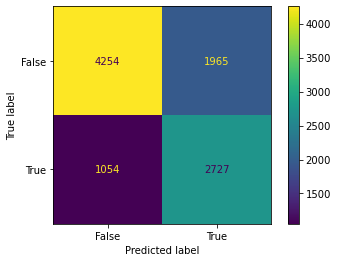

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


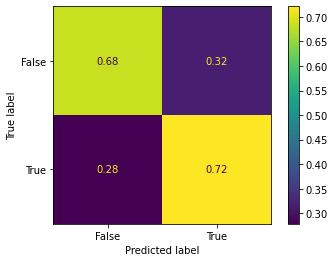



Gradient Boost
accuracy: 0.7862


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


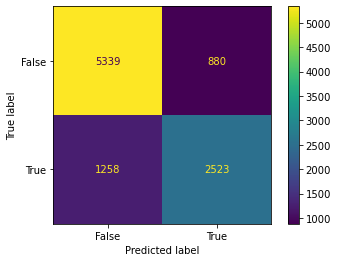

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


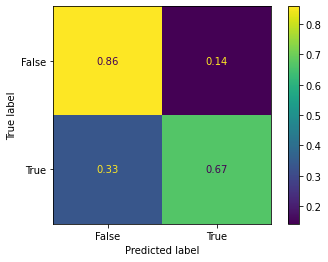

In [222]:
steps_lr = [('est', LogisticRegression())]
steps_rf = [('est', RandomForestClassifier())]
steps_svc = [('scaler', SVC())]
steps_gnb = [('gaussiannb', GaussianNB())]
steps_gbc = [('GBC', GradientBoostingClassifier())]


pipeline_lr = Pipeline(steps_lr)
pipeline_rf = Pipeline(steps_rf)
pipeline_svc = Pipeline(steps_svc)
pipeline_gnb = Pipeline(steps_gnb)
pipeline_gbc = Pipeline(steps_gbc)

for pipe, name in zip([pipeline_lr,pipeline_rf, pipeline_svc, pipeline_gnb, pipeline_gbc], ['LogisticRegression', 'RandomForest', 'SVC', 'Naive Bayes','Gradient Boost']):
    pipe.fit(X_train, y_train)
    print(name)
    y_pred = pipe.predict(X_test)
    print('accuracy:', np.mean(y_pred==y_test))
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    plot_confusion_matrix(pipe, X_test, y_test, normalize='true')
    plt.show()
    print('\n')

In [221]:
for pipe, name in zip([pipeline_lr,pipeline_rf, pipeline_svc, pipeline_gnb, pipeline_gbc], ['LogisticRegression', 'RandomForest', 'SVC', 'Naive Bayes','Gradient Boost']):
    pipe.fit(X_train, y_train)
    print(name)
    y_pred = pipe.predict(X_test)
    print('Classification Report')
    print(classification_report(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Classification Report
              precision    recall  f1-score   support

       False       0.74      0.84      0.79      6219
        True       0.66      0.50      0.57      3781

    accuracy                           0.71     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.71      0.70     10000

RandomForest
Classification Report
              precision    recall  f1-score   support

       False       0.80      0.80      0.80      6219
        True       0.67      0.66      0.67      3781

    accuracy                           0.75     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000

SVC
Classification Report
              precision    recall  f1-score   support

       False       0.76      0.83      0.79      6219
        True       0.67      0.56      0.61      3781

    accuracy                           0.73     10000
   macro avg       0.71   

Why did you choose this approach and what alternatives did you consider? Any concerns? How valid is your model? Key indicators of model performance?

#### The confusion matrix and the classifcation report were used to validate the performance for the  model, Gradient Boosting Classifier had an accuracy of 79%  and the confusion matrix predicted that there were 86% in-active users and 67% active users. 

### Feature Importance

Gradient Boosting Classifier
Feature: 0, Score: 0.04199
Feature: 1, Score: 0.00405
Feature: 2, Score: 0.19454
Feature: 3, Score: 0.07009
Feature: 4, Score: 0.16283
Feature: 5, Score: 0.01754
Feature: 6, Score: 0.23876
Feature: 7, Score: 0.16530
Feature: 8, Score: 0.01600
Feature: 9, Score: 0.06101
Feature: 10, Score: 0.02789


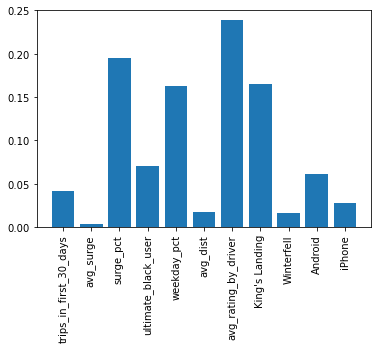

In [235]:
gbd = GradientBoostingClassifier()
gbd.fit(X_train, y_train)
print('Gradient Boosting Classifier')
importance = gbd.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
labels = ["trips_in_first_30_days", "avg_surge", "surge_pct", "ultimate_black_user", "weekday_pct", "avg_dist", 
        "avg_rating_by_driver", "King's Landing", "Winterfell", "Android", "iPhone"]
plt.bar([x for x in labels], importance)
plt.xticks(rotation=90)
plt.show()

### Recommendations

Based on the insights from the modeling, Ultimate should use Gradient Boosting Classifier to determine customer retention moving forward. An interesting feature that is important for retention was how the driver is rating the rider. 

Riders from King's Landing may have important characteristics suggesting why they seem to be impacted unlike the customers from Winterfell. 

I would recommend studying the customers weekly use of the account since the surge price seems to be impacting long term retention, but also marketing to customers from certain locations who are not using Ultimate. 